![image](https://raw.githubusercontent.com/IBM/watson-machine-learning-samples/master/cloud/notebooks/headers/watsonx-Prompt_Lab-Notebook.png)
# Use watsonx, and `meta-llama/llama-3-2-11b-vision-instruct` model for image processing to generate a description of the IBM logo

#### Disclaimers

- Use only Projects and Spaces that are available in watsonx context.


## Notebook content

This notebook provides a detailed demonstration of the steps and code required to showcase support for Chat models.

Some familiarity with Python is helpful. This notebook uses Python 3.11.


## Learning goal

The purpose of this notebook is to demonstrate how to use watsonx.ai Chat models with images processing.


## Table of Contents

This notebook contains the following parts:

- [Setup](#setup)
- [Prepare the data image](#image)
- [Work with Foundation Models on watsonx](#models)
- [Use the chat to answer a question about the image](#predict)
- [Summary](#summary)

<a id="setup"></a>
## Set up the environment

Before you use the sample code in this notebook, you must perform the following setup tasks:

-  Create a <a href="https://cloud.ibm.com/catalog/services/watsonxai-runtime" target="_blank" rel="noopener no referrer">watsonx.ai Runtime Service</a> instance (a free plan is offered and information about how to create the instance can be found <a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/getting-started/wml-plans.html?context=wx&audience=wdp" target="_blank" rel="noopener no referrer">here</a>).

### Install and import the `datasets` and dependencies

In [1]:
!pip3 install wget
!pip3 install -U "ibm_watsonx_ai>=1.1.14" 

### Define the watsonx.ai credentials
Use the code cell below to define the watsonx.ai credentials that are required to work with watsonx Foundation Model inferencing.

**Action:** Provide the IBM Cloud user API key. For details, see <a href="https://cloud.ibm.com/docs/account?topic=account-userapikey&interface=ui" target="_blank" rel="noopener no referrer">Managing user API keys</a>.

In [5]:
import getpass
from ibm_watsonx_ai import Credentials

credentials = Credentials(
    url="https://us-south.ml.cloud.ibm.com",
    api_key=getpass.getpass("Enter your watsonx.ai api key and hit enter: "),
)

### Define the project ID
You need to provide the project ID to give the Foundation Model the context for the call. If you have a default project ID set in Watson Studio, the notebook obtains that project ID. Otherwise, you need to provide the project ID in the code cell below.

In [6]:
import os

try:
    project_id = ""
except KeyError:
    project_id = input("Enter your project_id and hit enter: ")

<a id="image"></a>
## Data Image Preparation

Download the IBM logo.

In [7]:
import wget

filename = '/Users/parthbansal/Desktop/invoice model/Invoice5.png'


if not os.path.isfile(filename):
    wget.download(url, out=filename)

Display the downloaded image.

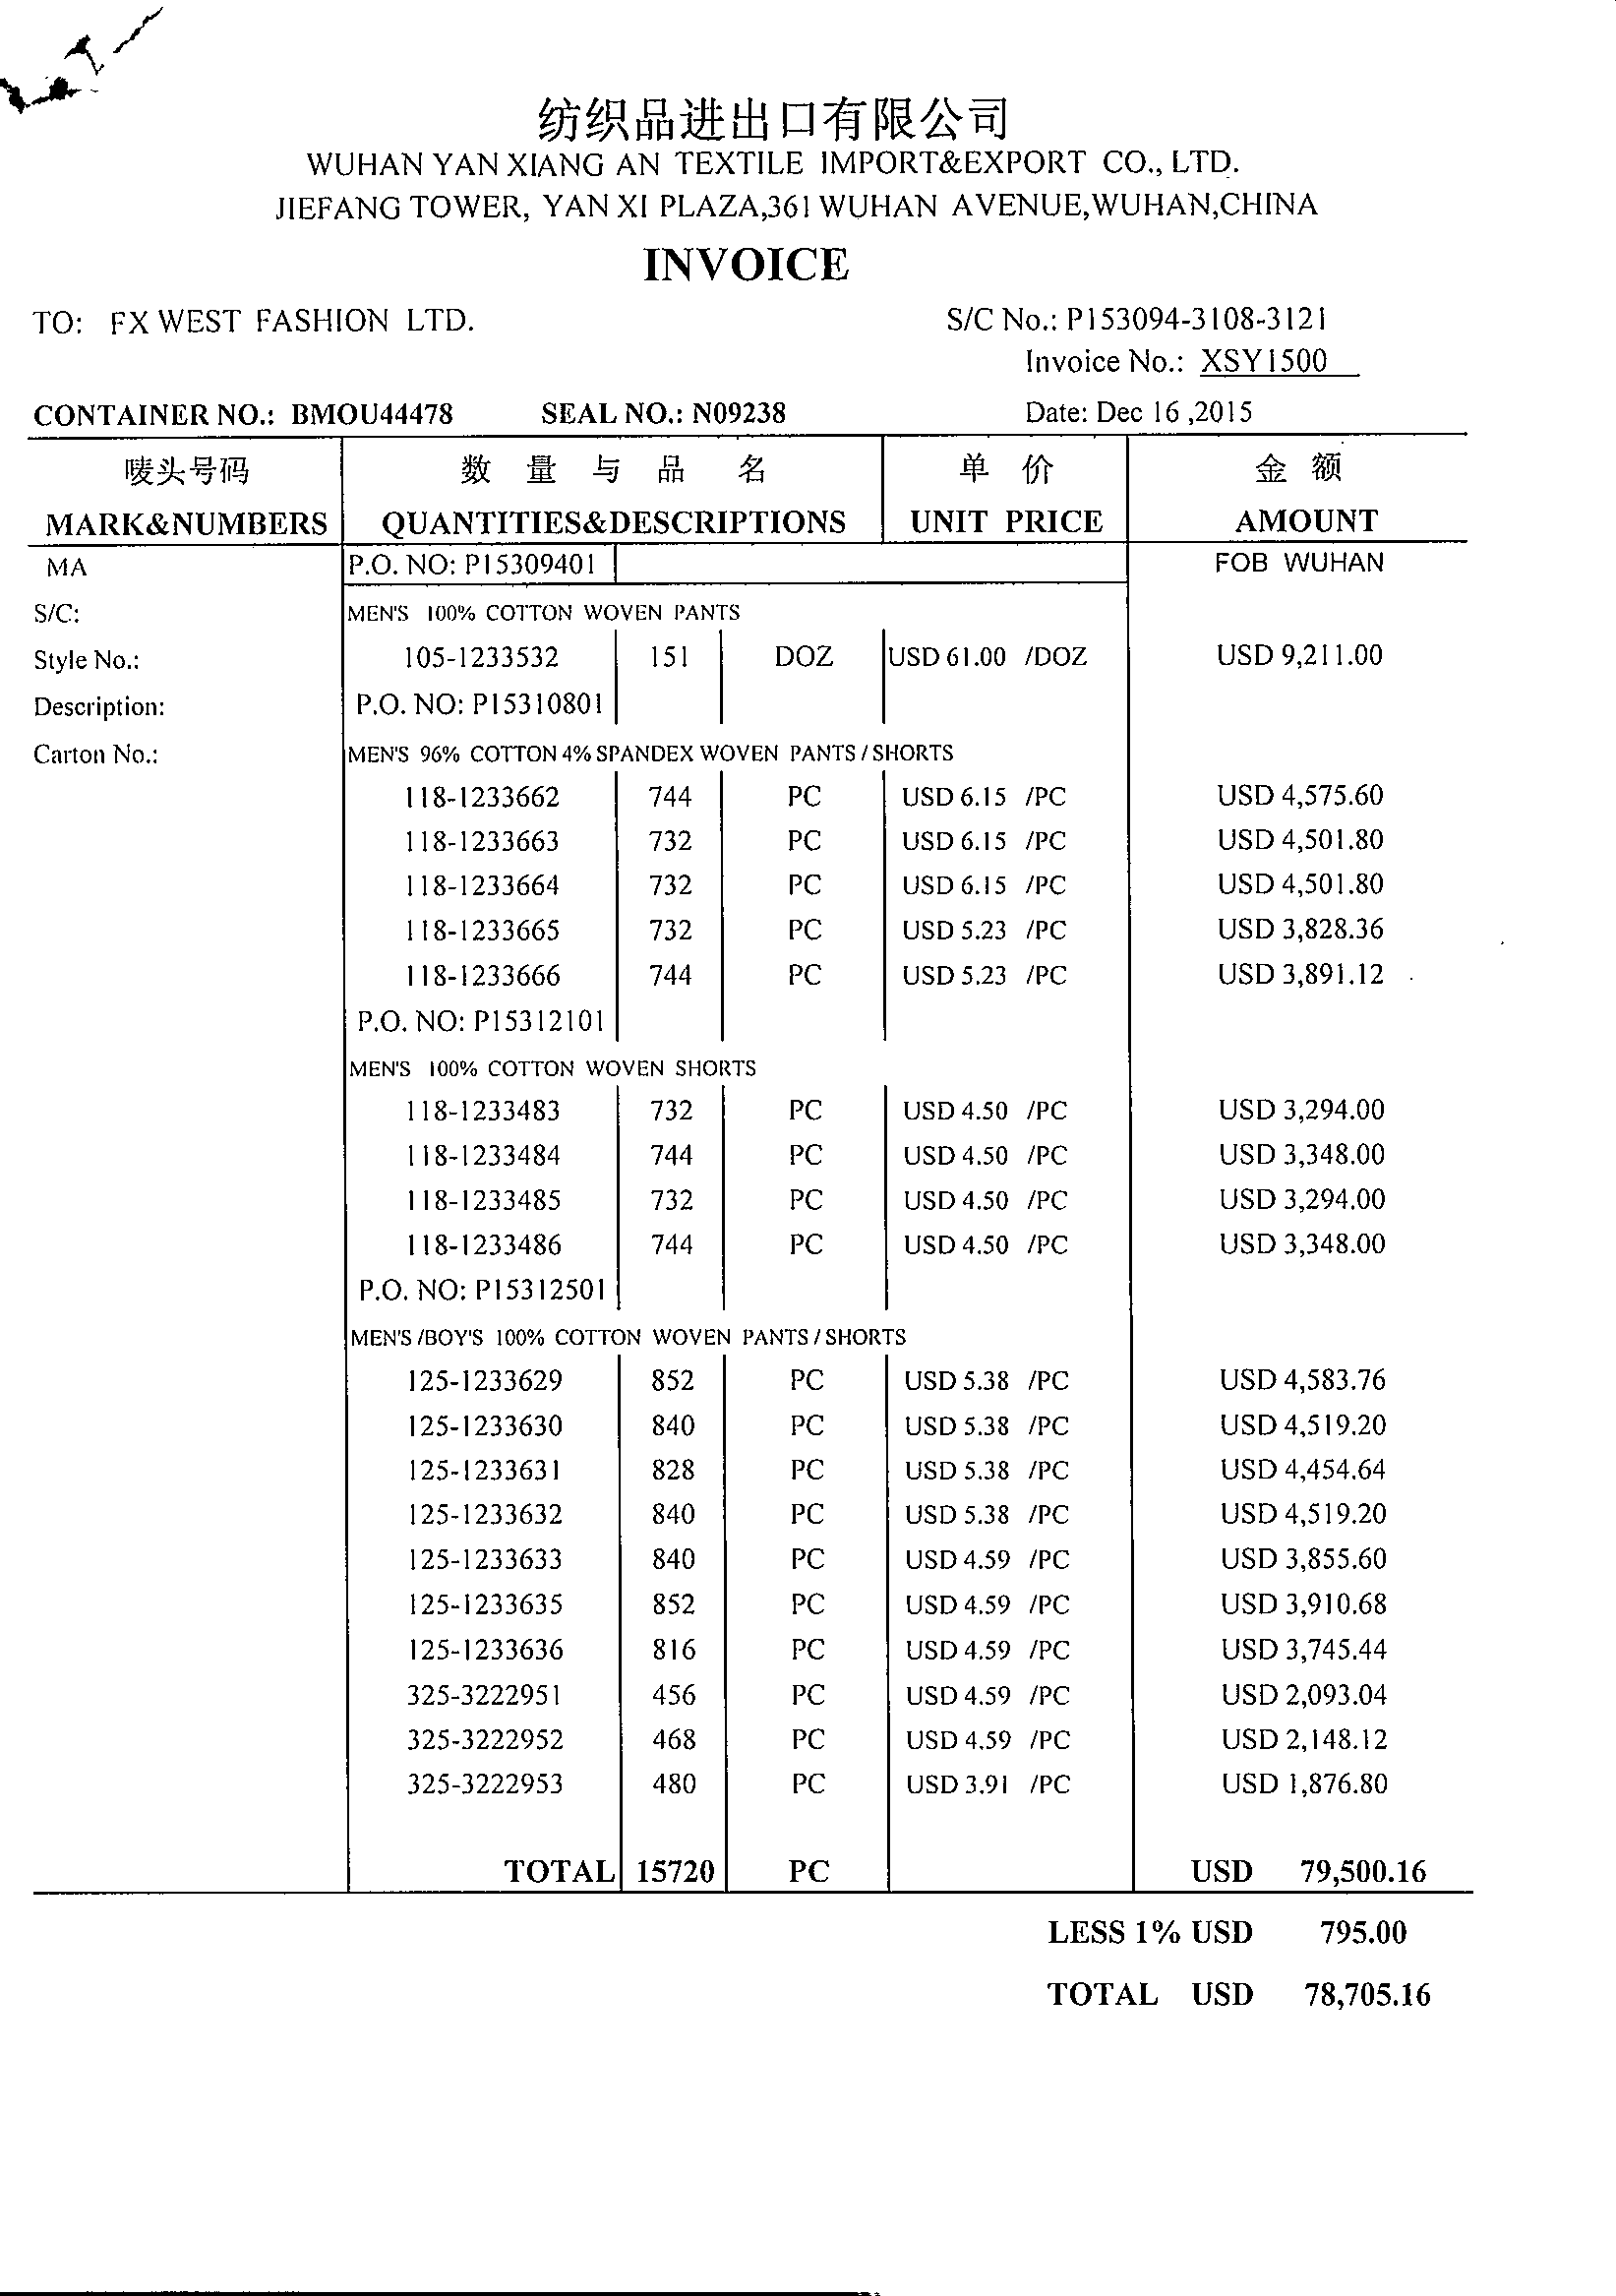

In [8]:
from IPython.display import Image

Image(filename=filename, width=600)

<a id="models"></a>
## Work with Foundation Models on `watsonx.ai`

Specify the `model_id` of the model you will use for the chat with image modalities.

In [9]:
model_id = "meta-llama/llama-3-2-11b-vision-instruct"

### Define the model parameters

You might need to adjust model `parameters` depending on the model you use.

In [10]:
from ibm_watsonx_ai.foundation_models.schema import TextChatParameters

TextChatParameters.show()

+-------------------+----------------------------------------+------------------------------+
| PARAMETER         | TYPE                                   | EXAMPLE VALUE                |
+===================+========================================+==============================+
| frequency_penalty | float, NoneType                        | 0.5                          |
+-------------------+----------------------------------------+------------------------------+
| logprobs          | bool, NoneType                         | True                         |
+-------------------+----------------------------------------+------------------------------+
| top_logprobs      | int, NoneType                          | 3                            |
+-------------------+----------------------------------------+------------------------------+
| presence_penalty  | float, NoneType                        | 0.3                          |
+-------------------+---------------------------------------

In [11]:
params = TextChatParameters(
    temperature=0,
    max_tokens=4000
)

### Initialize the model

Initialize the `ModelInference` class with the previously set parameters.

In [12]:
from ibm_watsonx_ai.foundation_models import ModelInference

model = ModelInference(
    model_id=model_id,
    credentials=credentials,
    project_id=project_id,
    params=params
)

Encode the image to `base64.b64encode`.

In [13]:
import base64

with open(filename, 'rb') as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

<a id="predict"></a>
## Use the chat to answer a question about the provided image

Provide a question about the image and send it in the messages payload.

In [14]:
# question = "extarct table and table of this image considering necessary parameters "

question = (
  "Extract all relevant product and invoice information from this image and return it as a well-structured JSON object. "
  "Group items by category (based on the product description blocks such as MEN'S 96% COTTON 4% SPANDEX WOVEN PANTS/SHORTS etc.). "
  "Each item should include: style_no, quantity, unit, unit_price_usd, total_cost_usd. "
  "Also include: invoice_total_usd, discount_usd, final_total_usd. Return only the JSON output."
)

messages = [
  {
    "role": "user",
    "content": [
      {
        "type": "text",
        "text": question
      },
      {
        "type": "image_url",
        "image_url": {
          "url": "data:image/jpeg;base64," + encoded_string,
        }
      }
    ]
  }
]



# messages2={
#   "invoice": {
#     "date": "2015-12-16",
#     "invoice_number": "XSY1500",
#     "buyer": "FX West Fashion Ltd.",
#     "seller": "Wuhan Yan Xiang An Textile Import & Export Co., Ltd.",
#     "items": [
#       {
#         "description": "Men's 100% Cotton Woven Pants",
#         "style_no": "105-1233532",
#         "quantity": 151,
#         "unit_price_usd": 61.00,
#         "total_cost_usd": 9211.00
#       },
#       {
#         "description": "Men's 96% Cotton 4% Spandex Woven Pants/Shorts",
#         "style_no": "118-1233662",
#         "quantity": 744,
#         "unit_price_usd": 6.15,
#         "total_cost_usd": 4575.60
#       },
#       {
#         "description": "Men's 100% Cotton Woven Shorts",
#         "style_no": "118-1233483",
#         "quantity": 732,
#         "unit_price_usd": 4.50,
#         "total_cost_usd": 3294.00
#       },
#       {
#         "description": "Men's/Boy's 100% Cotton Woven Pants/Shorts",
#         "style_no": "125-1233629",
#         "quantity": 852,
#         "unit_price_usd": 3.91,
#         "total_cost_usd": 1876.80
#       }
#     ],
#     "total_amount_usd": 79500.16,
#     "discount": {
#       "percentage": 1,
#       "amount_usd": 795.00
#     },
#     "final_total_usd": 78705.16
#   }
# }


Generate an answer to your question using the `meta-llama/llama-3-2-11b-vision-instruct` model.

In [15]:
response = model.chat(messages=messages)

Explore the generated content from the chat model.

In [16]:
print(response["choices"][0]["message"]["content"])
# print(response)
# print("Matches expected:", response == messages2)

**Product and Invoice Information Extraction**

**JSON Object:**

```json
{
  "MEN'S 100% COTTON WOVEN PANTS": [
    {
      "style_no": "105-1233532",
      "quantity": 151,
      "unit": "DOZ",
      "unit_price_usd": 61.00,
      "total_cost_usd": 9211.00
    },
    {
      "style_no": "118-1233663",
      "quantity": 732,
      "unit": "PC",
      "unit_price_usd": 6.15,
      "total_cost_usd": 4501.80
    },
    {
      "style_no": "118-1233664",
      "quantity": 732,
      "unit": "PC",
      "unit_price_usd": 6.15,
      "total_cost_usd": 4501.80
    },
    {
      "style_no": "118-1233665",
      "quantity": 732,
      "unit": "PC",
      "unit_price_usd": 5.23,
      "total_cost_usd": 3828.36
    },
    {
      "style_no": "118-1233666",
      "quantity": 744,
      "unit": "PC",
      "unit_price_usd": 5.23,
      "total_cost_usd": 3891.12
    }
  ],
  "MEN'S 96% COTTON 4% SPANDEX WOVEN PANTS/SHORTS": [
    {
      "style_no": "118-1233662",
      "quantity": 744,
      "uni

In [17]:
import json
import re


raw_content = response["choices"][0]["message"]["content"]


print("Raw content from model:\n", repr(raw_content))

# Step 3: Try to extract JSON if it's wrapped in markdown (```json ... ```)
match = re.search(r"```(?:json)?\s*(\{.*?\})\s*```", raw_content, re.DOTALL)

if match:
    cleaned_json_str = match.group(1)
    print("Found JSON inside markdown code block.")
else:
    cleaned_json_str = raw_content.strip()
    print(" No code block found — using raw content directly.")

# Step 4: Try to parse the cleaned JSON string
try:
    parsed_json = json.loads(cleaned_json_str)
    print(" JSON parsed successfully.")
except json.JSONDecodeError as e:
    print(" Error decoding JSON from model output:", e)
    parsed_json = {}

# Step 5: Save to file only if parsed_json is not empty
output_path = "invoice_output1.json"
if parsed_json:
    with open(output_path, "w") as f:
        json.dump(parsed_json, f, indent=2)
    print("Saved invoice data to:", output_path)
else:
    print("Skipping file write — parsed data is empty or invalid.")

# Optional: Display final saved content if file was written
if parsed_json:
    with open(output_path, "r") as f:
        print("\nFinal saved content:")
        print(f.read())


Raw content from model:
 '**Product and Invoice Information Extraction**\n\n**JSON Object:**\n\n```json\n{\n  "MEN\'S 100% COTTON WOVEN PANTS": [\n    {\n      "style_no": "105-1233532",\n      "quantity": 151,\n      "unit": "DOZ",\n      "unit_price_usd": 61.00,\n      "total_cost_usd": 9211.00\n    },\n    {\n      "style_no": "118-1233663",\n      "quantity": 732,\n      "unit": "PC",\n      "unit_price_usd": 6.15,\n      "total_cost_usd": 4501.80\n    },\n    {\n      "style_no": "118-1233664",\n      "quantity": 732,\n      "unit": "PC",\n      "unit_price_usd": 6.15,\n      "total_cost_usd": 4501.80\n    },\n    {\n      "style_no": "118-1233665",\n      "quantity": 732,\n      "unit": "PC",\n      "unit_price_usd": 5.23,\n      "total_cost_usd": 3828.36\n    },\n    {\n      "style_no": "118-1233666",\n      "quantity": 744,\n      "unit": "PC",\n      "unit_price_usd": 5.23,\n      "total_cost_usd": 3891.12\n    }\n  ],\n  "MEN\'S 96% COTTON 4% SPANDEX WOVEN PANTS/SHORTS": [\n

Explore the output from the model.

In [ ]:
response

{'id': 'chatcmpl-ae8243a6-f9e0-43c3-917e-fe3f3de6357f---137aca8232e1b36f2692c828035fb20f',
 'object': 'chat.completion',
 'model_id': 'meta-llama/llama-3-2-11b-vision-instruct',
 'model': 'meta-llama/llama-3-2-11b-vision-instruct',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': '**Product and Invoice Information Extraction**\n\n**JSON Object:**\n\n```json\n{\n  "MEN\'S 100% COTTON WOVEN PANTS": [\n    {\n      "style_no": "105-1233532",\n      "quantity": 151,\n      "unit": "DOZ",\n      "unit_price_usd": 61.00,\n      "total_cost_usd": 9211.00\n    },\n    {\n      "style_no": "118-1233663",\n      "quantity": 732,\n      "unit": "PC",\n      "unit_price_usd": 6.15,\n      "total_cost_usd": 4501.80\n    },\n    {\n      "style_no": "118-1233664",\n      "quantity": 732,\n      "unit": "PC",\n      "unit_price_usd": 6.15,\n      "total_cost_usd": 4501.80\n    },\n    {\n      "style_no": "118-1233665",\n      "quantity": 732,\n      "unit": "PC",\n      "

<a id="summary"></a>
## Summary and next steps

You successfully completed this notebook!
 
You learned how to describe an image using `ModelInference`.
 
Check out our _<a href="https://ibm.github.io/watsonx-ai-python-sdk/samples.html" target="_blank" rel="noopener no referrer">Online Documentation</a>_ for more samples, tutorials, documentation, how-tos, and blog posts. 

### Author

**Mateusz Szewczyk**, Software Engineer at watsonx.ai.

Copyright © 2024-2025 IBM. This notebook and its source code are released under the terms of the MIT License.